# Fintech545 Assignment2
## September 14, 2022

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm

### 1. Problem 1

Use the stock returns in DailyReturn.csv for this problem. DailyReturn.csv contains returns for 100 large US stocks and as well as the ETF, SPY which tracks the S&P500.
Create a routine for calculating an exponentially weighted covariance matrix. If you have a package that calculates it for you, verift that it calculates the values you expect. This means you still have to implement it. Vary $\lambda\in(0,1)$. Use PCA and plot the cumulative variance explained by each eigenvalue for each $\lambda$ chosen. What does this tell us about values of $\lambda$ and the effect it has on covariance matrix.

1.1 First, we read the csv file and drop the date column because it should not have any effect on other data.

In [2]:
data = pd.read_csv("DailyReturn.csv")
data = data.drop("Unnamed: 0",axis=1)
data

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,FB,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,0.002608,0.001474,0.010897,0.005842,0.032571,0.000825,0.002566,0.003228,0.026648,-0.002330,...,-0.000329,-0.002156,-0.004130,0.010683,0.001944,0.005416,0.009789,0.012832,-0.004696,0.012841
1,-0.001036,-0.005285,-0.005149,-0.028955,0.017539,-0.030443,-0.029104,-0.050515,0.001498,0.008437,...,0.015748,0.005984,-0.000207,-0.002181,0.003732,0.003913,-0.002568,-0.010957,0.013526,-0.008040
2,0.005363,-0.000336,-0.003332,-0.004551,0.126616,-0.000869,0.001068,0.012569,0.019361,0.003527,...,0.002221,-0.002974,-0.005599,0.011770,0.006395,0.004618,-0.009720,-0.000173,0.002017,0.017145
3,0.000900,0.004575,0.006426,0.016775,-0.006274,0.013543,0.006478,-0.039186,0.066952,0.002033,...,-0.002263,0.008121,0.003337,-0.003545,0.000887,-0.118035,0.000476,-0.006752,-0.002013,0.001073
4,-0.004430,-0.003148,0.042114,0.004864,0.019078,0.049595,0.048367,-0.011368,-0.010762,-0.010555,...,-0.014625,-0.007233,-0.012679,-0.052368,-0.014174,-0.002922,-0.017132,-0.054210,-0.022191,-0.011786
5,0.009649,0.024992,0.003651,0.015941,0.037751,-0.002520,-0.002039,0.015054,0.020040,0.006741,...,0.000658,0.009273,-0.061474,0.011733,0.008537,0.001360,-0.000223,-0.000369,0.013966,0.009913
6,0.002029,-0.018156,0.022414,-0.021511,0.034316,0.015064,0.014655,0.020983,0.025099,-0.009354,...,-0.009481,-0.003445,-0.010543,0.005972,-0.036531,0.002806,-0.008829,0.003503,-0.006574,0.004448
7,0.001720,-0.005607,-0.006785,-0.016107,0.084910,-0.030727,-0.030326,0.019810,0.010169,-0.002683,...,-0.001848,0.002799,-0.001360,0.008646,0.011714,-0.004183,0.008757,0.019475,0.015125,0.017713
8,0.004043,0.007116,0.011416,-0.001615,-0.030275,0.013488,0.014530,-0.005758,0.022225,0.005904,...,-0.002564,0.007388,0.002270,0.016858,0.003961,-0.013961,0.015835,0.001802,-0.002018,0.010053
9,0.006105,0.009799,0.002611,0.021508,0.035717,0.008014,0.006355,0.010790,0.007462,0.002744,...,0.012375,0.015971,0.018347,0.004833,0.022914,0.015445,-0.002898,0.007375,0.013064,0.016488


1.2 Implement the exponentially weighted covariance algorithm learned in class

In [3]:
def expo_weighted_cov(data,lam):
    weight = np.zeros(60)
    t = len(data)
    for i in range(t):
        weight[t-1-i]  = (1-lam)*lam**i
    weight = weight/sum(weight)
    norm_data = data - data.mean()
    return norm_data.T @ (np.diag(weight) @ norm_data)

1.3 Implement the PCA algorithm to calculate the explained variance and plot the cumulative variance explained by each eigenvalue for each $\lambda$ chosen.

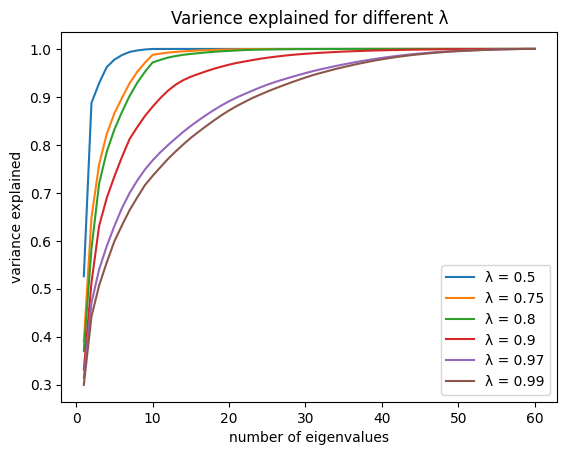

In [329]:
#PCA
def pca(a, nval=None):
    #Eigenvalue decomposition
    vals, vecs = np.linalg.eig(a)
    zip_list = list(zip(vals,vecs))
    zip_list.sort(key=lambda x:-x[0])
    vals = [x[0] for x in zip_list]
    vecs = [x[1] for x in zip_list]
    
    tv = sum(vals)

    posv = len([i for i in range(len(vals)) if vals[i]>=1e-8])
    if nval != None:
        posv = min(posv,nval)
    return sum(vals[0:posv])/sum(vals)

    #vecs = [i[posv] for i in vecs]
lam = [0.5, 0.75, 0.8, 0.9, 0.97, 0.99]
nval = range(60)
for i in lam:
    C = expo_weighted_cov(data,i)
    per = []
    for j in nval:
        per.append(pca(C,j+1))
    plt.plot([n+1 for n in range(60)], per, label = f"λ = {i}")
    plt.xlabel("number of eigenvalues")
    plt.ylabel("variance explained")
    plt.title("Varience explained for different λ")
plt.legend()


What does this tell us about values of $\lambda$ and the effect it has on covariance matrix?

λ represents how much we value the recent information. A smaller λ means that weights are decaying faster and as we normalize the weights, the recent weight will have a greater value. Thus, a greater λ has a smaller explained variance for the same number of eigenvalues as its weights are more equally distributed.

### Problem 2
Copy the chol_psd(), and near_psd() functions from the course repository - implement in your programming language of choice. These are core functions you will need throughout the remainder of the class. 

Implement Higham's 2002 nearest psd correlation function. 

Generate a non-psd correclation matrix that is 500x500. You can use the code I used in class. 

Use near_psd() and Higham's method to fix the matrix. Confirm the matrix is now PSD. 

Compare the results of both using the Frobenius Norm. Compare the run time between the two. How does the run time of each function compare as N increases? 

Based on the above, discuss the pros and cons of each method and when you would us each. There is no wrong answer here, I want you to think through this and tell me what you think.

2.1 Implement the chol_psd algorithm

In [331]:
def chol_psd(a):
    a = np.array(a)
    l = np.zeros_like(a)
    for i in range(len(a)):
        for j in range(i,len(a)): 
            if i==j:
                l[j,i] = a[j,i]-sum([l[i,k]**2 for k in range(j)])
                if abs(l[j][i]) <= 1e-8:
                    l[j,i] = 0
                else:
                    l[j,i] = l[j,i]**0.5
            else:
                if l[i,i] == 0:
                    l[j,i] =0
                else:
                    l[j,i] = (a[j,i]-np.dot(l[j,0:i],l[i,0:i]))/l[i,i]
    return l

2.2 Implement the near_psd algorithm

In [332]:
def near_psd(a, epsilon=0.0):
    np.array(a)
    cov = False
    for i in np.diag(a):
        if abs(i-1)>1e-8:
            cov = True
    if cov:
        invSD = np.diag(np.reciprocal(np.sqrt(np.diag(a))))
        a = invSD @ a @ invSD
    vals, vecs = np.linalg.eigh(a)
    vals = np.array([max(i,epsilon) for i in vals])
    T = np.reciprocal(np.square(vecs) @ vals)
    T = np.diag(np.sqrt(T))
    l = np.diag(np.sqrt(vals))
    B = T @ vecs @l
    out = B @ B.T
    
    if cov:
        invSD = np.diag(np.reciprocal(np.diag(invSD)))
        out = invSD @ out @ invSD
    return out

2.3 Implement the Higham algorithm

In [278]:
def Ps(a, w):
    a = np.sqrt(w)@ a @np.sqrt(w)
    vals, vecs = np.linalg.eigh(a)
    vals = np.array([max(i,0) for i in vals])
    return np.sqrt(w)@ vecs @ np.diagflat(vals) @ vecs.T @ np.sqrt(w)

In [279]:
def Pu(a):
    b = a.copy()
    for i in range(len(a)):
        for j in range(len(a[0])):
            if i==j:
                b[i][i]=1
    return b

In [356]:
def F(y,a):
    d = y-a
    s = 0
    for i in range(len(d)):
        for j in range(len(d)):
            s+=d[i][j]**2
    return s

In [282]:
def Higham(a,w,max_iter = 1000, tor = 1e-8):
    r1 = float("inf")
    y = a
    s = np.zeros_like(y)
    for i in range(max_iter):
        r = y - s
        x = Ps(r, w)
        s = x-r
        y = Pu(x)
        r = F(y,a)
        if abs(r-r1)<tor:
            break
        else:
            r1 = r
    return y

2.4 Generate a non-psd correclation matrix that is 500x500

In [381]:
n = 500
sigma = np.full((n,n),0.9)
for i in range(n):
    sigma[i,i]=1.0
sigma[0,1] = 0.7357
sigma[1,0] = 0.7357
sigma

array([[1.    , 0.7357, 0.9   , ..., 0.9   , 0.9   , 0.9   ],
       [0.7357, 1.    , 0.9   , ..., 0.9   , 0.9   , 0.9   ],
       [0.9   , 0.9   , 1.    , ..., 0.9   , 0.9   , 0.9   ],
       ...,
       [0.9   , 0.9   , 0.9   , ..., 1.    , 0.9   , 0.9   ],
       [0.9   , 0.9   , 0.9   , ..., 0.9   , 1.    , 0.9   ],
       [0.9   , 0.9   , 0.9   , ..., 0.9   , 0.9   , 1.    ]])

2.5 Use near_psd() and Higham's method to fix the matrix. Print out the eigenvalues to confirm that all of them are greater than 0 to confirm the matrix is now PSD

In [285]:
print(np.all(np.linalg.eigvals(near_psd(sigma)))>-1e-8)
print(np.all(np.linalg.eigvals(Higham(sigma, np.identity(len(sigma)))))>-1e-8)

True
True


2.6 Compare the runtime between near_psd and higham algorithm for N=20,50,100,500,1000,2000

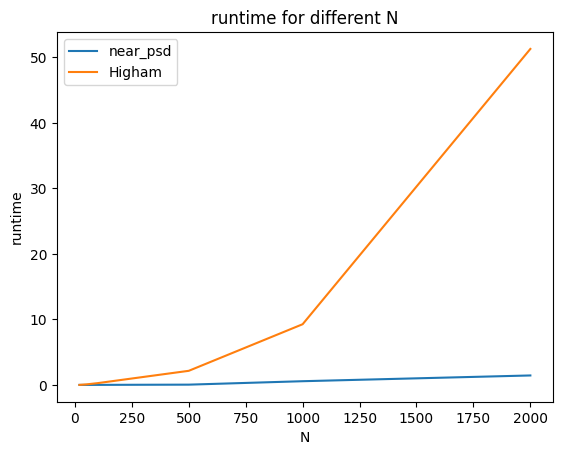

In [338]:
import timeit
ns = [20, 50,100,500,1000,2000]
time = []
for n in ns:
    sigma = np.full((n,n),0.9)
    for i in range(n):
        sigma[i,i]=1.0
    sigma[0,1] = 0.7357
    sigma[1,0] = 0.7357
    start = timeit.default_timer()
    near_psd(sigma)
    stop = timeit.default_timer()
    time.append(stop - start)
plt.plot(ns,time, label = "near_psd")
time = []
for n in ns:
    sigma = np.full((n,n),0.9)
    for i in range(n):
        sigma[i,i]=1.0
    sigma[0,1] = 0.7357
    sigma[1,0] = 0.7357
    start = timeit.default_timer()
    Higham(sigma, np.identity(len(sigma)))
    stop = timeit.default_timer()
    time.append(stop - start)
plt.plot(ns,time, label = "Higham")
plt.xlabel("N")
plt.ylabel("runtime")
plt.title("runtime for different N")
plt.legend()

2.6 Compare the Frobenius Norm between near_psd and higham algorithm for N=20,50,100,500,1000,2000

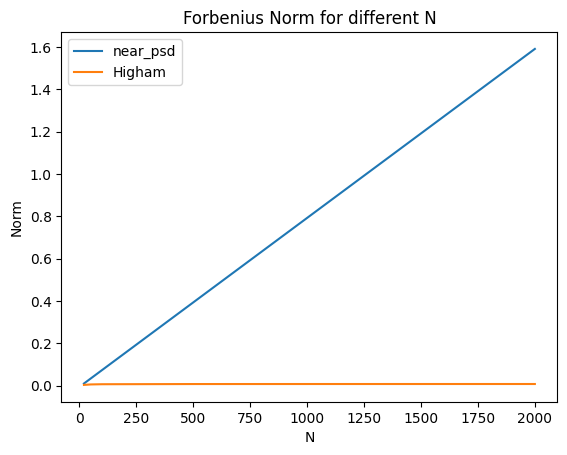

In [339]:
ns = [20, 50, 100, 500, 1000, 2000]
norm = []
for n in ns:
    sigma = np.full((n,n),0.9)
    for i in range(n):
        sigma[i,i]=1.0
    sigma[0,1] = 0.7357
    sigma[1,0] = 0.7357
    norm.append(F(near_psd(sigma),sigma))
plt.plot(ns,norm, label = "near_psd")
norm = []
for n in ns:
    sigma = np.full((n,n),0.9)
    for i in range(n):
        sigma[i,i]=1.0
    sigma[0,1] = 0.7357
    sigma[1,0] = 0.7357
    norm.append(F(Higham(sigma, np.identity(len(sigma))),sigma))
plt.plot(ns,norm, label = "Higham")
plt.xlabel("N")
plt.ylabel("Norm")
plt.title("Forbenius Norm for different N")
plt.legend()

There is a tradeoff between runtime and how close the result matrix is compared to the original one. When the matrix is small, there is not much difference between near_psd algorithm and Higham algorithm for both runtime and accuracy. However, as the size of the matrix(N) increases, the runtime of Higham becomes much larger than the runtime of near_psd algorithm. The accuracy(how close to the original matrix) of Higham stays almost unchange for large N but the accuracy of near_psd becomes lower as its Forbenius norm becomes larger. Therefore, Higham is used if you want a high accuracy and does not care about the runtime(when N is not that big) and near_psd is used when runtime is considered(when N is super large)

### Problem 3
Using DailyReturn.csv.
Implement a multivariate normal simulation that allows for simulation directly from a covariance matrix or using PCA with an optional paramter for % variance explained. If you have a library that can do there, you still need to implement it yourself for this homework and prove that it functions as expected.

Generate a correlation matrix and variance vector 2 ways:
1. Standard Pearson correlation/variance(you do not need to reimplement the cor() and var() functions).
2. Exponentially weighted $\lambda = 0.97$

Combine these to form 4 different covariance matrices. (Pearson correlation + var()), Pearson correlation + EW variance, etc.)

Simulate 25,000 draws from each covariance matrix using:
1. Direct Simulation
2. PCA with 100% explained.
3. PCA with 75% explained.
4. PCA with 50% explained.

Calculate the covariance of the simulated values. Compare the simulated covariance to it's input matrix using the Frobenius Norm(L2 norm, sum of the square of the difference between the matrices). Compare the run times for each simulation.

What can we say about the trade offs between time to run and accuracy.

3.1 Implement a multivariate normal simulation

In [255]:
def multi_normal_sim(cov,sim):
    return chol_psd(cov) @ np.random.normal(size = (len(cov),sim))

3.2 Implement PCA simulation

In [256]:
def simulate_pca(a, nsim, percentage = 1-1e-8):
    vals, vecs = np.linalg.eigh(a)
    tv = sum(vals)
    for i in range(len(vals)):
        i = len(vals)-i-1
        if vals[i]<0:
            vals = vals[i+1:]
            vecs = vecs[:,i+1:]
            break
        if sum(vals[i:])/tv>percentage:
            vals = vals[i:]
            vecs = vecs[:,i:]
            break
    B = vecs @ np.diag(np.sqrt(vals))
    r = np.random.normal(size = (len(vals),nsim))
    return (B @ r)

3.3 Implement transition functions between var, cor and cov

In [341]:
def var(cov):
    return np.diag(cov)
def cor(cov):
    return np.diag(np.reciprocal(np.sqrt(var(cov)))) @ cov @ np.diag(np.reciprocal(np.sqrt(var(cov)))).T
def cov(var, cor):
    std = np.sqrt(var)
    return np.diag(std) @ cor @ np.diag(std).T

3.4 Calculate 4 different covariance matrices

In [345]:
ew_cov = expo_weighted_cov(data,0.97)
norm_cov = np.cov(data.T)
new_cov1 = cov(np.var(data), cor(norm_cov))
new_cov2 = cov(var(ew_cov), cor(norm_cov))
new_cov3 = cov(np.var(data), cor(ew_cov))
new_cov4 = cov(var(ew_cov), cor(ew_cov))

3.5 Create bar plots for the Forbenius Norm of different simulations and different covariance matrix

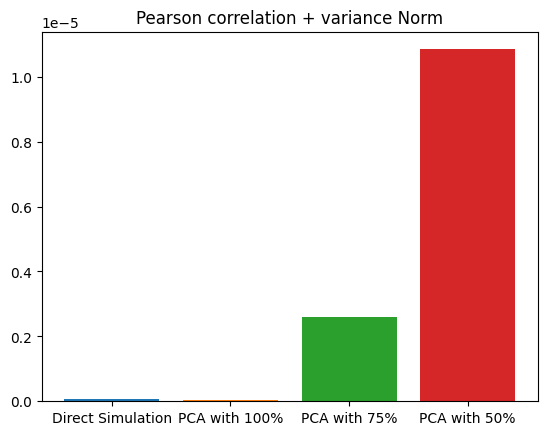

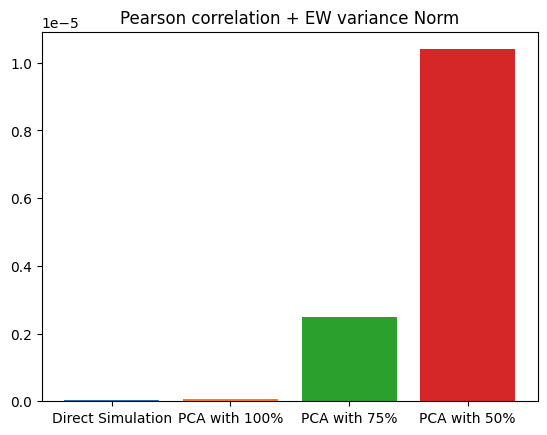

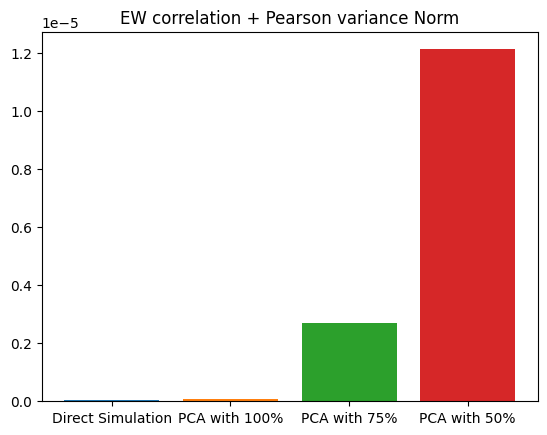

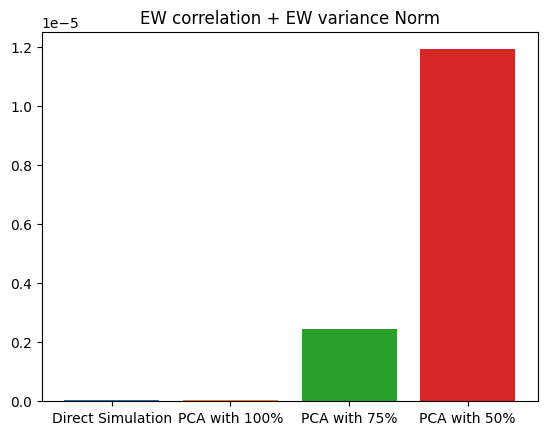

In [362]:
covs = [new_cov1, new_cov2, new_cov3, new_cov4]
titles = ["Pearson correlation + variance Norm","Pearson correlation + EW variance Norm", "EW correlation + Pearson variance Norm", "EW correlation + EW variance Norm"]
for i in range(len(covs)):
    plt.figure(i)
    t = titles[i]
    i = covs[i]
    data1 = multi_normal_sim(i,25000)
    data2 = simulate_pca(i, 25000, percentage = 1)
    data3 = simulate_pca(i, 25000, percentage = 0.75)
    data4 = simulate_pca(i, 25000, percentage = 0.5)
    plt.bar("Direct Simulation",F(i,np.cov(data1)))
    plt.bar("PCA with 100%",F(i,np.cov(data2)))
    plt.bar("PCA with 75%",F(i,np.cov(data3)))
    plt.bar("PCA with 50%",F(i,np.cov(data4)))
    plt.title(t)

3.5 Create bar plots for the runtime of different simulations and different covariance matrix

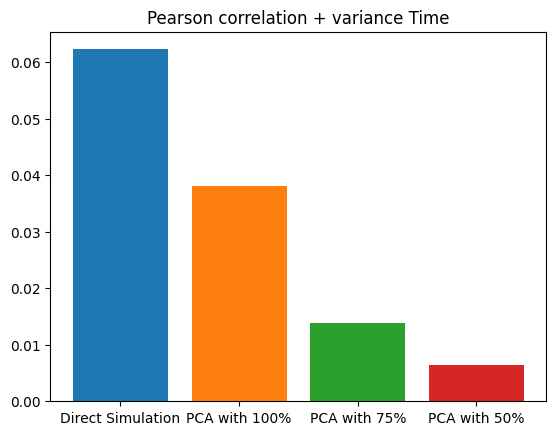

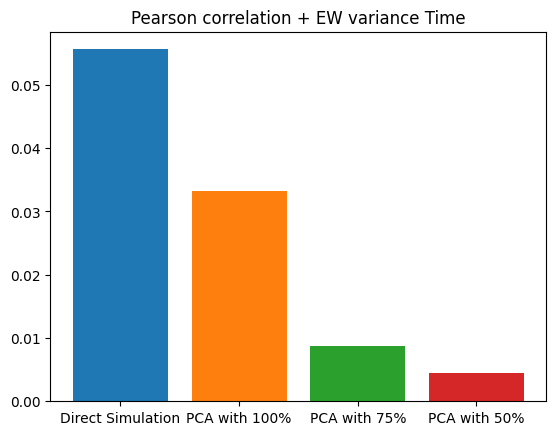

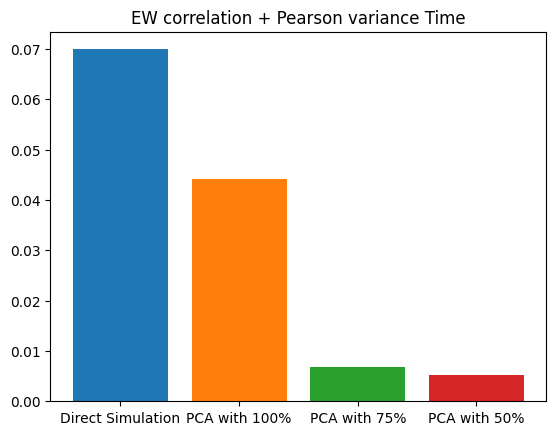

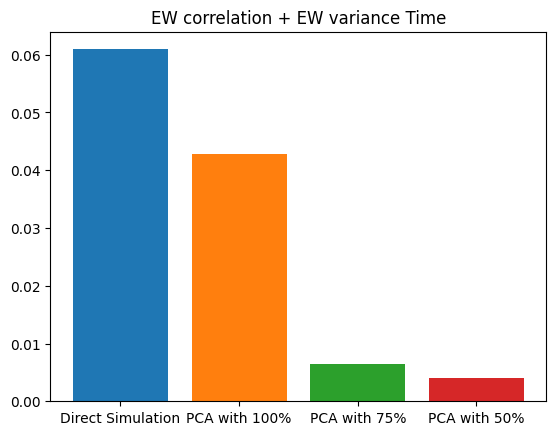

In [380]:
covs = [new_cov1, new_cov2, new_cov3, new_cov4]
titles = ["Pearson correlation + variance Time","Pearson correlation + EW variance Time", "EW correlation + Pearson variance Time", "EW correlation + EW variance Time"]

for i in range(len(covs)):
    ts = []
    plt.figure(i)
    t = titles[i]
    i = covs[i]
    start1 = timeit.default_timer()
    data1 = multi_normal_sim(i,25000)
    stop1 = timeit.default_timer()
    ts.append(stop1-start1)
    
    start2 = timeit.default_timer()
    data2 = simulate_pca(i, 25000, percentage = 1)
    stop2 = timeit.default_timer()
    ts.append(stop2-start2)
    
    start3 = timeit.default_timer()
    data3 = simulate_pca(i, 25000, percentage = 0.75)
    stop3 = timeit.default_timer()
    ts.append(stop3-start3)
    
    start4 = timeit.default_timer()
    data4 = simulate_pca(i, 25000, percentage = 0.5)
    stop4 = timeit.default_timer()
    ts.append(stop4-start4)
    
    plt.bar("Direct Simulation",ts[0])
    plt.bar("PCA with 100%",ts[1])
    plt.bar("PCA with 75%",ts[2])
    plt.bar("PCA with 50%",ts[3])
    plt.title(t)

Again, there is a tradeoff between runtime and accuracy. PCA is used to reduce dimentionalities and may lose information in order to make the runtime faster. By using PCA and by reducing the percentage explained, we lost more and more information on the data. The Forbenius Norm is increasing and the runtime is deacreasing with the use of PCA and its percentage decreasing.